In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

In [2]:
class CountAboveMetric(metrics.BaseMetric):
    """Count the number of visit under certain conditions. Multiple conditions should be provided as a list."""
    
    def __init__(self, col, threshold, **kwargs):
        super(CountAboveMetric, self).__init__(col=col, **kwargs)
        self.colname = col
        self.threshold = threshold
        
    def run(self, dataSlice, slicePoint=None):
        
        if type(self.colname) == list:
            
            #If the threshold does not have the same length as the column names, give prompt.
            if len(self.colname) != len(self.threshold):
                print('Error! The number of the thresholds should be the same as the required columns.')
            
            else:                       
                for i in range(len(self.colname)):
                    if i == 0:
                        # Look for the indices of the data that fullfil the criteria. 
                        index = np.nonzero(dataSlice[self.colname[i]] > self.threshold[i])[0]
                    else: 
                        indexCurrent = np.nonzero(dataSlice[self.colname[i]] > self.threshold[i])[0]
                        index = np.intersect1d(index, indexCurrent)

                count = len(index)
                return count
        
        else: # If only one limitation is provided.
            index = np.nonzero(dataSlice[self.colname] > self.threshold)[0]
            count = len(index)
            return count

In [3]:
opsdb = db.OpsimDatabase('baseline2018a.db')
outDir = 'outDir'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
m = CountAboveMetric(['airmass', 'fiveSigmaDepth'], [1.1, 23])
Slicer = slicers.HealpixSlicer(nside=8)
Sqlconstraint = 'night<30'

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes


Querying database SummaryAllProps with constraint night<30 for columns ['fieldRA', 'fiveSigmaDepth', 'airmass', 'fieldDec']
Found 22070 visits
Running:  ['Count']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<30" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 238 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.858458  dipole: lon: 21.1227, lat: 15.9557, amp: 6.52412
Plotting complete.


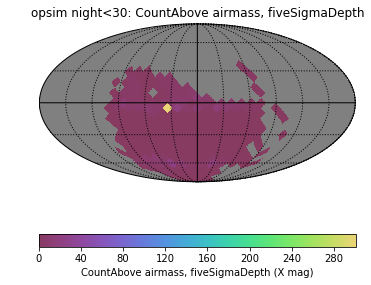

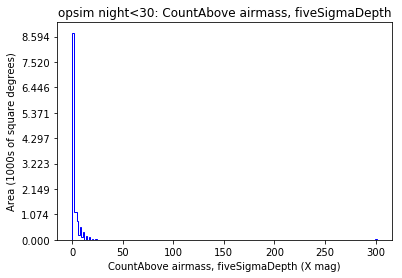

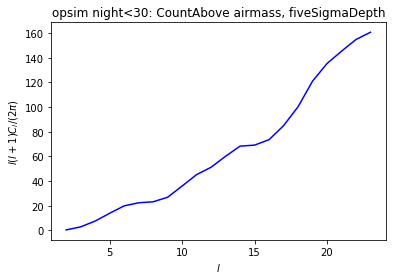

In [5]:
mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
resultdsDb = db.ResultsDb(outDir=outDir)
BundleDict = {'Count': mb}

group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

monopole: 0.858458  dipole: lon: 21.1227, lat: 15.9557, amp: 6.52412


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 238 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


{'SkyMap': 1, 'Histogram': 2, 'PowerSpectrum': 3}

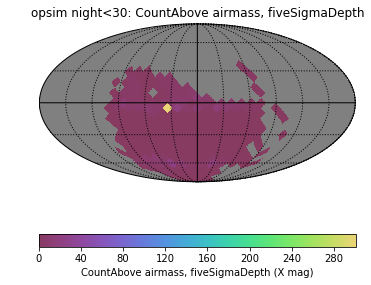

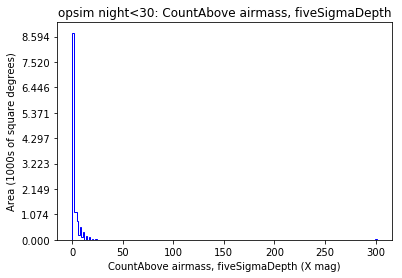

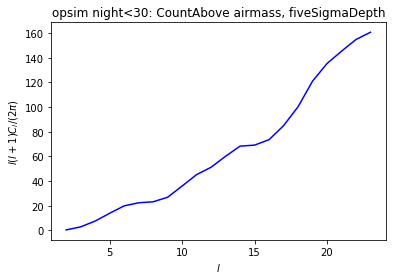

In [6]:
mb.plot()

In [15]:
mb.metricValues.mask[np.nonzero(mb.metricValues>50)[0]] = True

monopole: 1.77448  dipole: lon: 21.5947, lat: 35.1206, amp: 2.0698


{'SkyMap': 1, 'Histogram': 2, 'PowerSpectrum': 3}

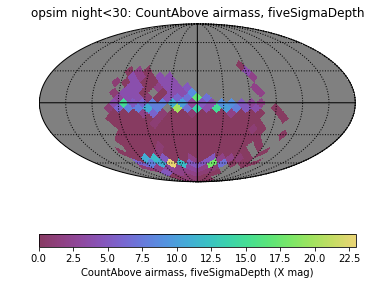

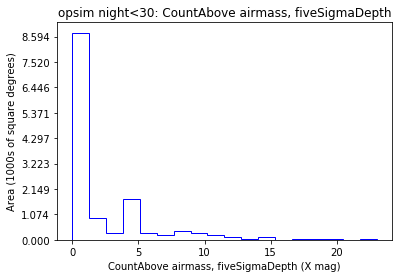

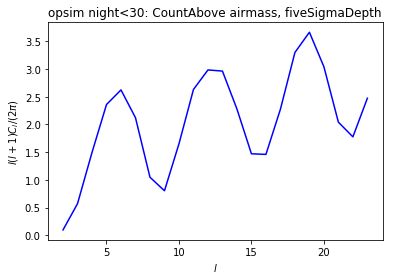

In [17]:
mb.plot(savefig=True)